# Modelos Lineales Generalizados

## Regresión Logística

En este ejemplo usaremos la base de datos Pima Indians Diabetes Database, tomada de kaggle. Este conjunto de datos fue recolectado por el 
Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales de Estados Unidos. El obejtivo de este conjunto de datos es predecir el diagnostico de cuando un paciente tiene o no diabetes, con base a diferentes medidas registradas como por ejemplo su edad, su nivel de insulina, entre otros. Los registros fueron tomados para mujeres de al menos 21 años de edad.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


diabetes = pd.read_csv("D:\Proyectos\ICFES\SEMINARIO\datos\diabetes.csv")

In [2]:
diabetes.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

Estamos interesados en modelar la variable outcome como variable de respuesta. Así, partimos el conjunto en nuestra matriz de diseño y nuestra variable de respuesta,

In [3]:
names = list(diabetes.columns.values)

x_names=names[:-1]

X = diabetes[x_names]
Y = diabetes.Outcome

Ahora vamos a partir nuestro conjunto de datos en dos subconjuntos respectivamente, los datos para entrenar el modelo y los datos para probarlo. 

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


El 75% de los datos serán usados en el entrenamiento del modelo y el 25% restante  van a ser usados para validar el modelo. 


In [5]:
logit_model =LogisticRegression(max_iter=1000)
logit_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred=logit_model.predict(X_test)

Ahora para evaluar el modelo calcularemos la matriz de confusión. Esta matriz contiene el número de aciertos o errores cometidos por el algoritmo.


| Clase | 0 | 1 |
| --- | --- | --- |
| 0 | correctas | incorrectas |
| 1 | incorrectas | correctas |





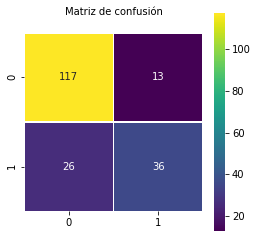

In [7]:
confusion = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4,4)) 
ay=sns.heatmap(confusion, 
        xticklabels=[0,1],
        yticklabels=[0,1],
        ax=ax, 
        annot=True, fmt="g",linewidths=.5,square=True,cmap='viridis')  

ax.set_title('Matriz de confusión\n', fontsize =10)
plt.show()

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))


Accuracy: 0.796875
Precision: 0.7346938775510204


# Perceptron  

En este ejemplo usaremos la base de datos Iris contenida en la libreria sklearn, esta base de datos contiene información sobre especies de flores y sus caracterisicas, tales como la logitud del petalo, su ancho, entre otras. El proposito de este modelo es determinar la especie de una flor contenida en el conjunto iris a partir de sus caracteristicas.

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Vamos a observar los datos,

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [12]:
X = iris.data[:, [2, 3]]
y = iris.target

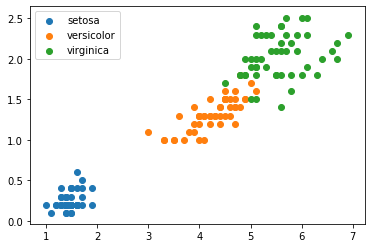

In [13]:
import matplotlib.pyplot as plt

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                label=iris.target_names[cl])
plt.legend()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Hay {} en el conjunto de entrenamienoto y {} en el de prueba'.format(
X_train.shape[0], X_test.shape[0]))

Hay 105 en el conjunto de entrenamienoto y 45 en el de prueba


In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [16]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, label=iris.target_names[cl])
    
   
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label="test set")

In [17]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Muestras mal etiquetadas: %d' % (y_test != y_pred).sum())

Muestras mal etiquetadas: 5


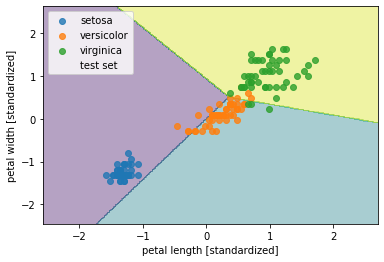

In [18]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Multinomial

In [19]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [20]:
iris_df = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'] )
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

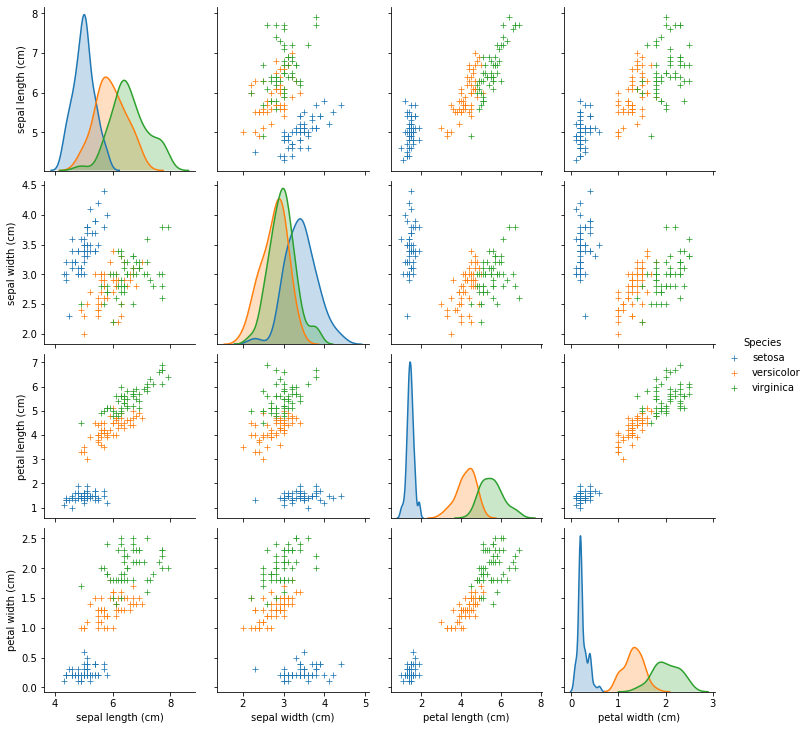

In [21]:
g = sns.pairplot(iris_df, hue='Species' , markers='+')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
model = LogisticRegression(max_iter=1000)


In [24]:
fit=model.fit(X_train_std,np.array(y_train).ravel())

In [25]:
predict = model.predict(X_test_std)

print('Muestras mal etiquetadas: %d' % (y_test != predict).sum())

Muestras mal etiquetadas: 2


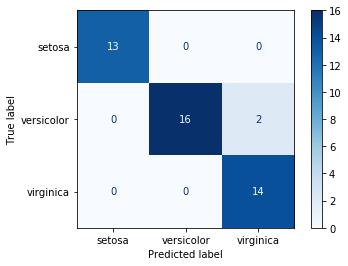

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(fit, X_test_std, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94        18
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Donde:

    - precision: es el número de resultados que debieron ser identificados con la etiqueta dividido el número de resultados dados por el clasificador. 
    
    - recall: es el número de resultados etiquetados dividido el número dividido el número de todos los resultados que debieron ser identificados. 
    
    -f1-score: promedio P y r para cada clase. 
    
    - support: Número de muestras de los valores verdaderos "y_test" que caen en determinada clase.
    
